## CLASSIFY TWEETS BASED ON EMOTION CONTENT USING NLP





###  IMPORT ALL DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk import FreqDist,word_tokenize

from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional, Dense,Dropout,Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils

from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from os import makedirs


#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip


Using TensorFlow backend.


### Load data

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dsxuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/watex95/DATA-SCIENCE-PROJECTS/master/text_emotion.csv')

In [4]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


### EXPLORATORY DATA ANALYSIS

In [5]:
len(df['sentiment'].unique())

13

In [6]:
df.shape

(40000, 4)

In [7]:
df.columns

Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')

In [8]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

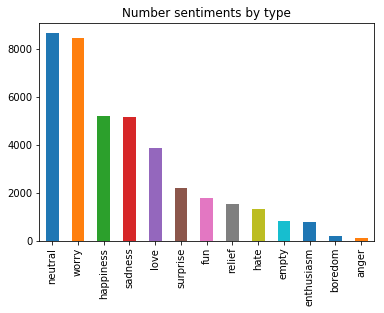

In [9]:
df['sentiment'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Number sentiments by type')

In [10]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline

In [12]:
sentimentAnalysis = df.groupby("sentiment")


### WORD CLOUD

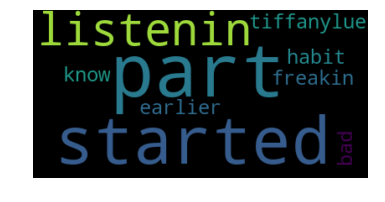

In [13]:
#Start with one review:
text = df.content[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

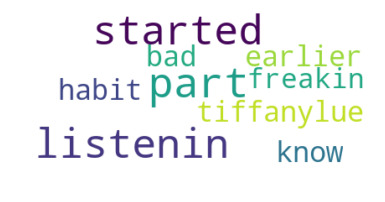

In [14]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

So now you'll combine all tweet content into one big text and create a big fat cloud to see which characteristics are most common sentiment

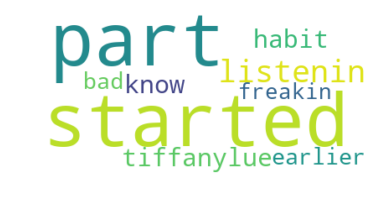

In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["feel", "play", "get", "bore", "wait"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ohhh, it seems like today, work, thank and love are the most mentioned words, and today is the most popular of them all. This aligns with the fact that  the tweeters always uses the word love often.

###   DATA CLEANING
     
   Convert all text to lower case.
    Replace REPLACE_BY_SPACE_RE symbols by space in text.
    Remove symbols that are in BAD_SYMBOLS_RE from text.
    Remove “@” in text.
    Remove stop words.
    Remove digits in text.

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
       
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['content'] = df['content'].apply(clean_text)
df['content'] = df['content'].str.replace('\d+', '')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:

def print_plot(index):
    example = df[df.index == index][['content', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('sentiment:', example[1])

print_plot(100)


first ever dropped call mobile call telstra less charged data even though data pack
sentiment: worry


In [18]:
print_plot(33)

feels strong contractions wants go http plurkcom p widk
sentiment: neutral


In [19]:
from sklearn.preprocessing import LabelEncoder

df['sentiment']=LabelEncoder().fit_transform(df['sentiment'])
df['sentiment'].unique()

array([ 2, 10,  3,  8, 12, 11,  7,  4,  6,  5,  1,  9,  0])

In [20]:
df['sentiment'].value_counts()

8     8638
12    8459
5     5209
10    5165
7     3842
11    2187
4     1776
9     1526
6     1323
2      827
3      759
1      179
0      110
Name: sentiment, dtype: int64

### FEATURE ENGINEERING

In [21]:
X=df['content'].astype(str)
y=df['sentiment'].values

In [22]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,y,test_size=0.3)

In [23]:
X_TRAIN.head()

35126                             easmart u online hotmail
13431                                   ohayemily okay bby
11716    ugh soooo drag assing today brighter note got ...
8240     tealshocked thats im getting new phone since p...
13086    smaknews sorry anna wintour repeated tweets so...
Name: content, dtype: object

In [24]:
X_TRAIN.shape,X_TEST.shape,Y_TRAIN.shape,Y_TEST.shape

((28000,), (12000,), (28000,), (12000,))

In [25]:
Y_TRAIN[:20]

array([ 8, 12, 10, 11, 12, 10, 11, 12,  5,  7, 12,  5,  5, 11,  4,  2,  2,
       12, 10, 10])

In [26]:
text=' '.join(X_TRAIN)
text=word_tokenize(text)
freq_dist_text=FreqDist(text)
unique_words=len(freq_dist_text)
unique_words

39188

In [27]:
max_len=max([len(s.split(' ')) for s in X_TRAIN])
max_len

26

In [28]:

#clean words and tokenization

X_TRAIN.fillna("fillna")
X_TEST.fillna("fillna")
X_TRAIN = X_TRAIN.str.lower()
X_TEST = X_TEST.str.lower()


tokenizer=Tokenizer(unique_words)
tokenizer.fit_on_texts(list(X_TRAIN))
X_TRAIN=tokenizer.texts_to_sequences(X_TRAIN)
X_TEST=tokenizer.texts_to_sequences(X_TEST)


X_TRAIN=sequence.pad_sequences(X_TRAIN,maxlen=max_len)
X_TEST=sequence.pad_sequences(X_TEST,maxlen=max_len)

Y_TRAIN=pd.get_dummies(Y_TRAIN)
Y_TEST=pd.get_dummies(Y_TEST)